# Proyecto final de curso de Introducción a Data Science Crehana
## Alumno: Christian Farnast Contardo
## Instructor: Yeison Tapasco
### Fecha: 18.08.2022

### Parte 1: Extracción y limpieza de datos

In [86]:
# Importacion de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import pandoc

In [4]:
# Pregunta 1, 2 y 3.
# Importación del dataset car_sales
auto = pd.read_csv('car_sales.csv')

In [5]:
auto.head()
# Se carga correctamente
# El dataset cuenta con encabezados
# No fue necesario ocupar delimitador

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [6]:
auto.isnull().sum()
# Pregunta 4:
# - Se tienen 11 variables con valores nulos
# - La variable "__year_resale_value" es importante pues indica el precio de reventa. 
# Debe considerarse como variable importante
# para predecir el valor de un auto. Debe tratarse sus valores nulos 
# pues la cantidad de datos es poca. Un buen indicador es su mediana.
# -Los valores de price in thousands es de solo 2, por lo que pueden eliminarse
#- Los demas valores nulos varian de 1 a 3 como maximo por lo que se decide eliminarlos

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

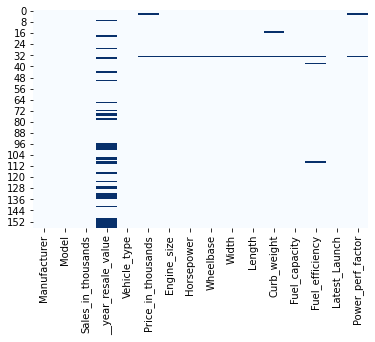

In [7]:
sns.heatmap(auto.isnull(),cbar = False, cmap = 'Blues')
plt.show()

In [8]:
# Considerando el tamaño del dataset, pueden eliminarse los valores nulos, 
# exceptuando los de la variable "__year_resale_value"
auto.shape

(157, 16)

In [9]:
# Determinacion de la mediana de la variable "__year_resale_value"
auto.describe()
# mediana: 14.180000

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [10]:
# Reemplazo de valores nulos por la mediana en variable "__year_resale_value"
auto['__year_resale_value'].replace(np.nan, auto['__year_resale_value'].median, inplace = True)

In [11]:
auto.dropna(subset = ['Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency','Power_perf_factor'], axis = 0, inplace = True)

In [12]:
auto.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

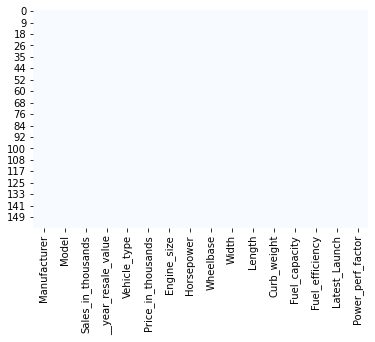

In [13]:
sns.heatmap(auto.isnull(),cbar = False, cmap = 'Blues')
plt.show()

In [14]:
# Pregungta 5
auto.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value     object
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

In [15]:
auto.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.36,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105


In [16]:
#auto['__year_resale_value'] = auto['__year_resale_value'].astype('float64', errors = 'raise')
auto['Latest_Launch'] = auto['Latest_Launch'].astype('datetime64')
auto['__year_resale_value'] = pd.to_numeric(auto['__year_resale_value'],errors = 'coerce')

In [17]:
auto.dtypes

Manufacturer                   object
Model                          object
Sales_in_thousands            float64
__year_resale_value           float64
Vehicle_type                   object
Price_in_thousands            float64
Engine_size                   float64
Horsepower                    float64
Wheelbase                     float64
Width                         float64
Length                        float64
Curb_weight                   float64
Fuel_capacity                 float64
Fuel_efficiency               float64
Latest_Launch          datetime64[ns]
Power_perf_factor             float64
dtype: object

### Parte 2: Análisis exploratorio de datos

In [18]:
# Pregunta 1
auto.describe()
#La variable 'Price in thousands', tiene valores muy extremos. 
# El 50% (desde el 25% hasta el 75% de los datos)
# está entre 17.888 y 31.938 dólares. 
# Sim embargo y de acuerdo al grafico a continuacion, 
# los valores extremos están por sobre el valor máximo.

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,152.000000,117.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,53.359072,18.031538,27.331822,3.049342,184.809211,107.413816,71.088816,187.059211,3.376184,17.959211,23.842105,76.704153
std,68.938380,11.605632,14.418669,1.049818,56.823152,7.717839,3.464666,13.471247,0.636593,3.937582,4.304788,25.180983
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,13.714000,11.240000,17.888750,2.300000,147.500000,102.900000,68.375000,177.475000,2.964750,15.775000,21.000000,59.755537
50%,29.213000,14.010000,22.747000,3.000000,175.000000,107.000000,70.400000,186.650000,3.336000,17.200000,24.000000,71.514623
75%,68.069750,19.875000,31.938750,3.575000,211.250000,112.200000,73.100000,195.125000,3.821500,19.800000,26.000000,89.408406
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [19]:
auto['Price_in_thousands'].describe()

count    152.000000
mean      27.331822
std       14.418669
min        9.235000
25%       17.888750
50%       22.747000
75%       31.938750
max       85.500000
Name: Price_in_thousands, dtype: float64

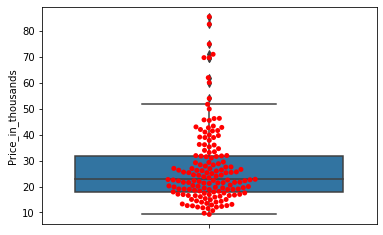

In [20]:
sns.boxplot(data = auto, y = 'Price_in_thousands')
sns.swarmplot(data = auto, y = 'Price_in_thousands', color = 'red')
plt.show()

In [21]:
#Pregunta 2: Normalizacion de length y width

auto['Length_Norm'] = auto['Length']/auto['Length'].max()
auto['Width_Norm'] = auto['Width']/auto['Width'].max()

In [22]:
auto.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Length_Norm,Width_Norm
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150,0.767929,0.842303
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778,0.859243,0.879850
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779,0.875724,0.893617
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639,0.792873,0.853567
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2011-08-09,84.565105,0.855234,0.952441


In [23]:
# Se considera necesario de normalozación la variable 'Power_perf_factor'. 
# Al ser un factor dejaremos 
# como 0 al auto de menor rendimiento de potencia y 
# 1 al de mayor rendimiento de potencia
auto['Power_perf_factor_Norm'] = auto['Power_perf_factor']/auto['Power_perf_factor'].max()

In [24]:
auto.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Length_Norm,Width_Norm,Power_perf_factor_Norm
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150,0.767929,0.842303,0.309763
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778,0.859243,0.879850,0.485642
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779,0.875724,0.893617,0.485743
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639,0.792873,0.853567,0.333667
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2011-08-09,84.565105,0.855234,0.952441,0.449469


In [25]:
auto[['Length_Norm','Width_Norm','Power_perf_factor_Norm']].describe()

,Length_Norm,Width_Norm,Power_perf_factor_Norm
count,152.000000,152.000000,152.000000
mean,0.833226,0.889722,0.407688
std,0.060006,0.043363,0.133839
min,0.665479,0.783479,0.123715
25%,0.790535,0.855757,0.317605
50%,0.831403,0.881101,0.380105
75%,0.869154,0.914894,0.475212
max,1.000000,1.000000,1.000000


In [26]:
# Los valores mnormalizados de Length y Width se ven de bastante uniformidad. 
# No así el power perf factor norm que se ven
# valores sobre el valor máximo.

In [27]:
# Pregunta 3
bins = np.linspace(min(auto['Horsepower']),
                   max(auto['Horsepower']),
                   5)
etiquetas = ['Low','Medium','High','Extra_High']
auto['Horsepower_binned'] = pd.cut(auto['Horsepower'],
                                  bins,
                                  labels = etiquetas,
                                  include_lowest = True)

In [28]:
auto[['Horsepower','Horsepower_binned']].head()

,Horsepower,Horsepower_binned
0,140.0,Low
1,225.0,Medium
3,210.0,Medium
4,150.0,Low
5,200.0,Medium


In [29]:
auto['Horsepower_binned'].value_counts()

Medium        85
Low           49
High          17
Extra_High     1
Name: Horsepower_binned, dtype: int64

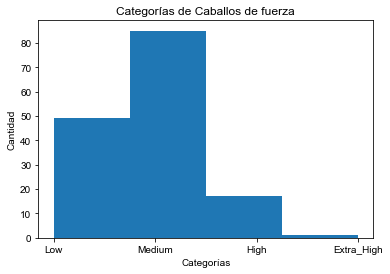

In [30]:
# Grafico auto['Horsepower_binned']
plt.hist(auto['Horsepower_binned'], bins = 4)
plt.xlabel('Categorías')
plt.ylabel('Cantidad')
plt.title('Categorías de Caballos de fuerza')
sns.set(font_scale = 1)
plt.show()
plt.close()

In [31]:
# Pregunta 4
auto1=pd.get_dummies(auto['Vehicle_type'], prefix = 'Dummy')

In [32]:
type(auto1)

pandas.core.frame.DataFrame

In [33]:
auto2 = pd.concat([auto,auto1], axis = 1)

In [34]:
auto2.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,...,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Length_Norm,Width_Norm,Power_perf_factor_Norm,Horsepower_binned,Dummy_Car,Dummy_Passenger
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,...,13.2,28.0,2012-02-02,58.280150,0.767929,0.842303,0.309763,Low,0,1
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,...,17.2,25.0,2011-06-03,91.370778,0.859243,0.879850,0.485642,Medium,0,1
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,...,18.0,22.0,2011-03-10,91.389779,0.875724,0.893617,0.485743,Medium,0,1
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,...,16.4,27.0,2011-10-08,62.777639,0.792873,0.853567,0.333667,Low,0,1
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,...,18.5,22.0,2011-08-09,84.565105,0.855234,0.952441,0.449469,Medium,0,1


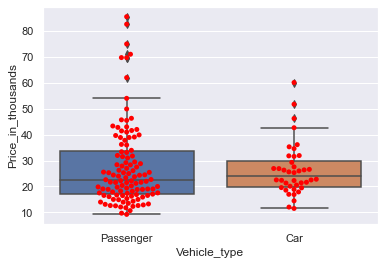

In [35]:
# Pregunta 5
sns.boxplot(data = auto, x = 'Vehicle_type', y = 'Price_in_thousands', showfliers = True)
sns.swarmplot(data = auto, x = 'Vehicle_type', y = 'Price_in_thousands', color = 'red')
plt.show()

In [36]:
# Los valores minimos de ambos tipos son relativamente iguales, 
# como tambien el valor de cada 50% (mediana de cada tipo)
# Se ve además que los outliers de la categoria Passenger son mucho mayores 
# en cantidad que los de la variable Car
# Una razon puede deberse a una mala trascripción del dato 
# como una mala anotacion de su precio.

In [37]:
# Pregunta 6
auto2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 156
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Manufacturer            152 non-null    object        
 1   Model                   152 non-null    object        
 2   Sales_in_thousands      152 non-null    float64       
 3   __year_resale_value     117 non-null    float64       
 4   Vehicle_type            152 non-null    object        
 5   Price_in_thousands      152 non-null    float64       
 6   Engine_size             152 non-null    float64       
 7   Horsepower              152 non-null    float64       
 8   Wheelbase               152 non-null    float64       
 9   Width                   152 non-null    float64       
 10  Length                  152 non-null    float64       
 11  Curb_weight             152 non-null    float64       
 12  Fuel_capacity           152 non-null    float64   

In [38]:
#Trabajaremos con auto 3 para la realizacion del heatmap
auto3 = auto2.drop(['Power_perf_factor','Width', 'Length'], axis = 1)

In [39]:
auto3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 156
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Manufacturer            152 non-null    object        
 1   Model                   152 non-null    object        
 2   Sales_in_thousands      152 non-null    float64       
 3   __year_resale_value     117 non-null    float64       
 4   Vehicle_type            152 non-null    object        
 5   Price_in_thousands      152 non-null    float64       
 6   Engine_size             152 non-null    float64       
 7   Horsepower              152 non-null    float64       
 8   Wheelbase               152 non-null    float64       
 9   Curb_weight             152 non-null    float64       
 10  Fuel_capacity           152 non-null    float64       
 11  Fuel_efficiency         152 non-null    float64       
 12  Latest_Launch           152 non-null    datetime64

In [40]:
auto3['__year_resale_value'].replace(np.nan,14.18000, inplace = True) 
#14.18000 es el valor de la mediana

In [41]:
auto3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 156
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Manufacturer            152 non-null    object        
 1   Model                   152 non-null    object        
 2   Sales_in_thousands      152 non-null    float64       
 3   __year_resale_value     152 non-null    float64       
 4   Vehicle_type            152 non-null    object        
 5   Price_in_thousands      152 non-null    float64       
 6   Engine_size             152 non-null    float64       
 7   Horsepower              152 non-null    float64       
 8   Wheelbase               152 non-null    float64       
 9   Curb_weight             152 non-null    float64       
 10  Fuel_capacity           152 non-null    float64       
 11  Fuel_efficiency         152 non-null    float64       
 12  Latest_Launch           152 non-null    datetime64

In [42]:
correlaciones = auto3.corr()

In [43]:
correlaciones

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Curb_weight,Fuel_capacity,Fuel_efficiency,Length_Norm,Width_Norm,Power_perf_factor_Norm,Dummy_Car,Dummy_Passenger
Sales_in_thousands,1.000000,-0.235361,-0.301850,0.027716,-0.192519,0.360186,0.008784,0.087437,-0.016474,0.260162,0.143664,-0.220031,0.243023,-0.243023
__year_resale_value,-0.235361,1.000000,0.783535,0.458422,0.671954,-0.051744,0.271214,0.260127,-0.334165,0.036759,0.165519,0.714367,-0.087907,0.087907
Price_in_thousands,-0.301850,0.783535,1.000000,0.623545,0.841062,0.108494,0.527148,0.423980,-0.491391,0.154924,0.328493,0.898948,-0.042077,0.042077
Engine_size,0.027716,0.458422,0.623545,1.000000,0.836649,0.472586,0.760908,0.666948,-0.737267,0.542036,0.692124,0.816362,0.268810,-0.268810
Horsepower,-0.192519,0.671954,0.841062,0.836649,1.000000,0.282166,0.610549,0.505455,-0.616075,0.384787,0.534726,0.993012,0.016786,-0.016786
Wheelbase,0.360186,-0.051744,0.108494,0.472586,0.282166,1.000000,0.651443,0.656815,-0.497305,0.840137,0.681205,0.254308,0.396693,-0.396693
Curb_weight,0.008784,0.271214,0.527148,0.760908,0.610549,0.651443,1.000000,0.864891,-0.819622,0.629261,0.723284,0.612011,0.526428,-0.526428
Fuel_capacity,0.087437,0.260127,0.423980,0.666948,0.505455,0.656815,0.864891,1.000000,-0.801783,0.570932,0.663125,0.504323,0.599317,-0.599317
Fuel_efficiency,-0.016474,-0.334165,-0.491391,-0.737267,-0.616075,-0.497305,-0.819622,-0.801783,1.000000,-0.447442,-0.602309,-0.608267,-0.576931,0.576931
Length_Norm,0.260162,0.036759,0.154924,0.542036,0.384787,0.840137,0.629261,0.570932,-0.447442,1.000000,0.705746,0.347225,0.149919,-0.149919


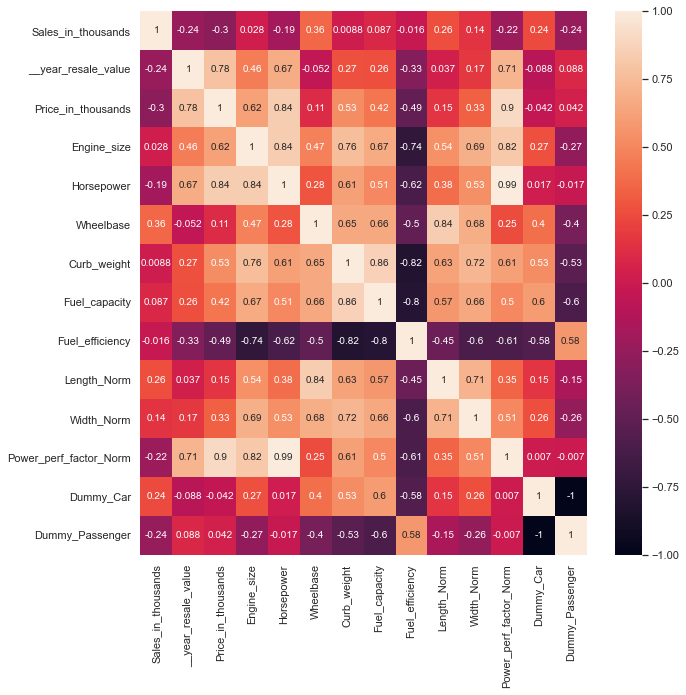

In [44]:
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(correlaciones, annot = True, annot_kws={"size": 10})
sns.set(font_scale = 1)
plt.show()
plt.close()

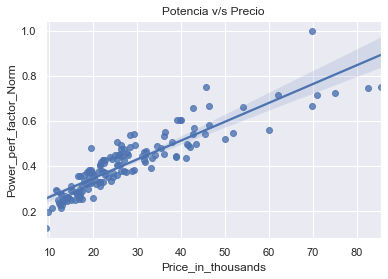

In [45]:
#regplot positivo
sns.regplot(data = auto3, x = 'Price_in_thousands', y = 'Power_perf_factor_Norm')
plt.title('Potencia v/s Precio')
plt.show()

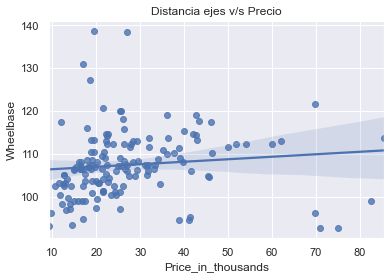

In [46]:
#regplot neutro
sns.regplot(data = auto3, x = 'Price_in_thousands', y = 'Wheelbase')
plt.title('Distancia ejes v/s Precio')
plt.show()

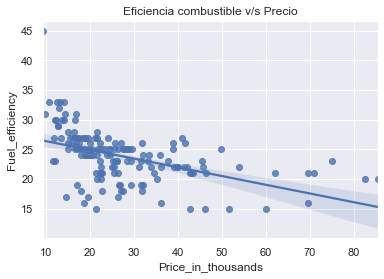

In [47]:
#regplot negativo
sns.regplot(data = auto3, x = 'Price_in_thousands', y = 'Fuel_efficiency')
plt.title('Eficiencia combustible v/s Precio')
plt.show()

In [48]:
auto3.isnull().sum()

Manufacturer              0
Model                     0
Sales_in_thousands        0
__year_resale_value       0
Vehicle_type              0
Price_in_thousands        0
Engine_size               0
Horsepower                0
Wheelbase                 0
Curb_weight               0
Fuel_capacity             0
Fuel_efficiency           0
Latest_Launch             0
Length_Norm               0
Width_Norm                0
Power_perf_factor_Norm    0
Horsepower_binned         0
Dummy_Car                 0
Dummy_Passenger           0
dtype: int64

### Parte 3: Modelos de aprendizaje automático

### Regresion Simple

In [49]:
# Regresion simple: __year_resale_value v/s Price_in_thousands
#a)Importacion de librerias.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [50]:
#b)Definicion de variables
X = auto3[['Price_in_thousands']]
Y = auto3['Power_perf_factor_Norm']

In [51]:
#c)Division del dataset en entrenamiento y testing (80/20)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

#d)Llamar al modelo y creacion del modelo con .fit
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

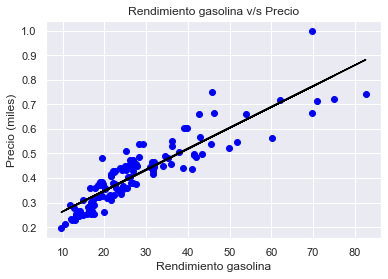

In [52]:
#e) Visualizacion del set de entrenamiento
regressor_train = plt
regressor_train.scatter(X_train,Y_train, color = 'blue')
regressor_train.plot(X_train.values, regressor.predict(X_train), color = 'black')
regressor_train.title('Rendimiento gasolina v/s Precio')
regressor_train.xlabel('Rendimiento gasolina')
regressor_train.ylabel('Precio (miles)')
regressor_train.show()
regressor_train.close()

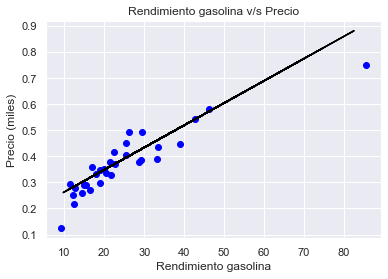

In [53]:
#f) Visualizacion del set de testing
regressor_train = plt
regressor_train.scatter(X_test,Y_test, color = 'blue')
regressor_train.plot(X_train.values, regressor.predict(X_train), color = 'black')
regressor_train.title('Rendimiento gasolina v/s Precio')
regressor_train.xlabel('Rendimiento gasolina')
regressor_train.ylabel('Precio (miles)')
regressor_train.show()
regressor_train.close()

In [54]:
#g) Pendiente e intercepto
print(f'intercepto: {regressor.intercept_}, Coeficiente: {regressor.coef_}')

intercepto: 0.17820814595448162, Coeficiente: [0.00851612]


In [55]:
#h)Score
regressor.score(X_test,Y_test)#porcentaje de prediccion.

0.7931723994191754

### Regresion múltiple

In [56]:
# Regresion lineal multiple: __year_resale_value, Horsepower, 
# Power_perf_factor_Norm, Engine_size, Curb_weight v/s Price_in_thousands
# a)Las librerias ya están importadas en regresion lineal simple

#b)Definicion de variables
X = auto3[['Horsepower','Power_perf_factor_Norm', 'Curb_weight']]
Y = auto3['Price_in_thousands'].values

In [57]:
#c)Division del dataset en entrenamiento y testing (80/20)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, 
						random_state = 0)

In [58]:
#d)Llamar al modelo y creacion del modelo con .fit
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

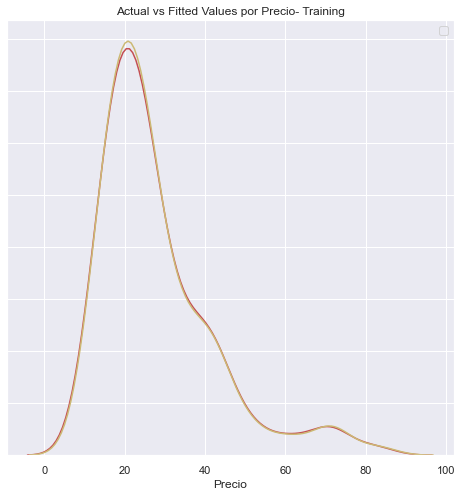

In [59]:
#e)Visualizacion del set de entrenamiento

fig,ax = plt.subplots(figsize = (8,8))
sns.distplot(Y_train, hist=False, color = 'r')
sns.distplot(regressor.predict(X_train), hist = False, color = 'y')

ax.set(yticklabels=[])
ax.tick_params(left=False)
ax.set(ylabel=None)
plt.legend(labels = ['Precio', 'Predict-Train'])

plt.title('Actual vs Fitted Values por Precio- Training')
plt.xlabel('Precio')

plt.legend(labels = ['Precio', 'Predict-Train'])

plt.show()
plt.close()

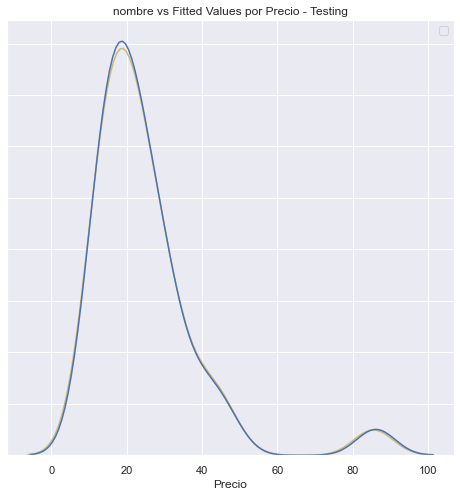

In [60]:
#f) Visualizacion del set de testing

f,ax = plt.subplots(figsize = (8,8))
sns.distplot(Y_test, hist=False, color = 'y')
sns.distplot(regressor.predict(X_test), hist = False, color = 'b', ax=ax)

ax.set(yticklabels=[])
ax.tick_params(left=False)
ax.set(ylabel=None)
plt.legend(labels = ['Precio', 'Predict-Testing'])

plt.title('nombre vs Fitted Values por Precio - Testing')
plt.xlabel('Precio')

plt.legend(labels = ['Precio', 'Predict-Testing'])

plt.show()
plt.close()
# estan superpuestas, son iguales (?)

In [61]:
#g) Pendiente e intercepto
print(f'intercepto: {regressor.intercept_}, Coeficiente: {regressor.coef_}')

intercepto: 0.9896588936894837, Coeficiente: [-9.42678762e-01  4.95491384e+02 -4.26865403e-01]


In [62]:
#h)Score
regressor.score(X_test,Y_test)#porcentaje de prediccion.

0.9996428435723786

### Bosques Aleatorios

In [63]:
# Bosques Aleatorios: __year_resale_value, Horsepower, Power_perf_factor_Norm, 
# Engine_size, Curb_weight v/s Price_in_thousands
#a)Importamos librerias
from sklearn.ensemble import RandomForestRegressor

#b)Definicion de variables
X = auto3[['Curb_weight','Horsepower', 'Power_perf_factor_Norm']]
Y = auto3['Price_in_thousands'].values

In [64]:
#c)Division del dataset en entrenamiento y testing (80/20)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, 
						random_state = 0)

In [65]:
#d) Modelo
forest = RandomForestRegressor(n_jobs = 2, oob_score = True, n_estimators = 10)
forest.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=10, n_jobs=2, oob_score=True)

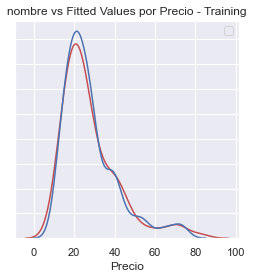

In [87]:
#e) Visualizacion del set de entrenamiento

f,ax = plt.subplots(figsize = (4,4))
ax = sns.distplot(Y_train, hist=False, color = 'r')
sns.distplot(forest.predict(X_train), hist = False, color = 'b', ax=ax)

ax.set(yticklabels=[])
ax.tick_params(left=False)
ax.set(ylabel=None)
plt.legend(labels = ['Precio', 'Predict-Train'])

plt.title('nombre vs Fitted Values por Precio - Training')
plt.xlabel('Precio')

plt.legend(labels = ['Precio', 'Predict-Train'])

plt.show()
plt.close()

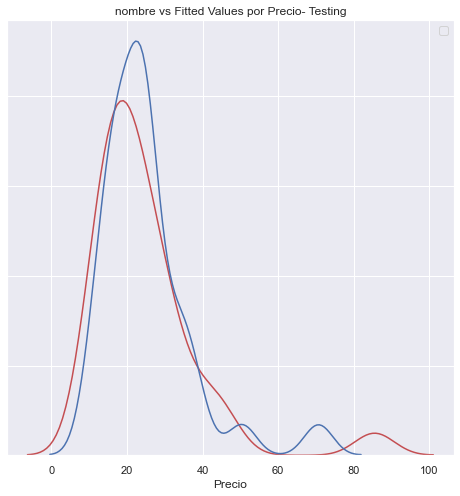

In [67]:
#f) Visualizacion del set de testing

f,ax = plt.subplots(figsize = (8,8))
ax = sns.distplot(Y_test, hist=False, color = 'r')
sns.distplot(forest.predict(X_test), hist = False, color = 'b', ax=ax)

ax.set(yticklabels=[])
ax.tick_params(left=False)
ax.set(ylabel=None)
plt.legend(labels = ['Precio', 'Predict-Testing'])

plt.title('nombre vs Fitted Values por Precio- Testing')
plt.xlabel('Precio')

plt.legend(labels = ['Precio', 'Predict-Testing'])

plt.show()
plt.close()

In [68]:
forest.score(X_test,Y_test)

0.9047312906622174

### Parte 4: Visualizaciones efectivas

In [78]:
# La pregunta 4B de la primera parte consultaba si era necesario 
# quitar la variable "__year_resale_value". 
cor = auto3[['Price_in_thousands','__year_resale_value']].corr()

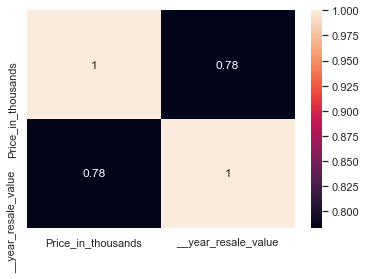

In [79]:
sns.heatmap(cor, annot = True)
plt.show()

In [72]:
# Las variable tienen una correlacion de 0.78, la cual es alta. Hay marcas que tienen una buena reventa, sin duda.

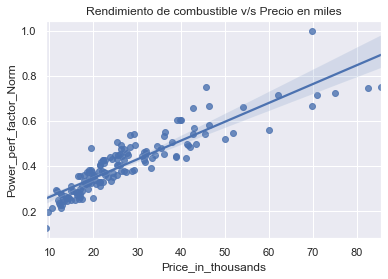

In [83]:
# Una buena decision fue la de normalizar la variable 'Power_perf_factor' 
# que mide el rendimiento del combustible.
# Uno como cliente, espera que su auto tenga un buen rendimiento de combustible
# Como se observa en el gráfico a continuación, existe una correlación 
# fuerte entre ambas variables.
# Lamentablemente quien quiera mejor performance, 
# tendrá que pagar mas dinero por dicho automovil...
sns.regplot(data = auto3, x = 'Price_in_thousands', y = 'Power_perf_factor_Norm')
plt.title('Rendimiento de combustible v/s Precio en miles')
plt.show()

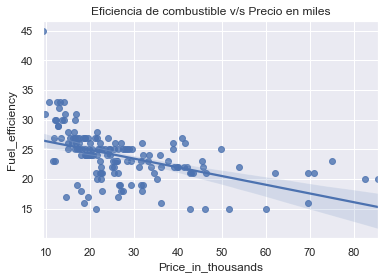

In [84]:
# Uno esperaria que Fuel_efficiency tuviera una relacion negativa 
# marcada con respecto a Price_in_thousands
sns.regplot(data = auto3, x = 'Price_in_thousands', y = 'Fuel_efficiency')
plt.title('Eficiencia de combustible v/s Precio en miles')
plt.show()

In [80]:
# Si bien el gráfico anterior no clarifica mucho la relación 
# negativa entre las variables
# Es mejor con un mapa de calor para demostrar que su 
#relacion negativa no es tan marcada
# Puede ser que un cliente simplemente no tome en cuenta 
# esta parte al momento de comprar un auto
cor1 = auto3[['Price_in_thousands','Fuel_efficiency']].corr()

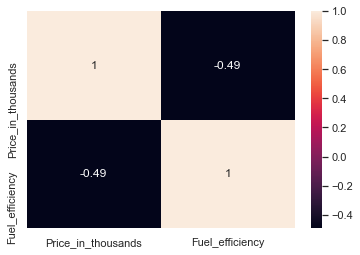

In [81]:
sns.heatmap(cor1, annot = True)
plt.show()